In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
import plotly.express as px
import plotly.graph_objects as go
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

In [73]:
train = pd.read_csv('SpaceTitanic_train.csv')
train.drop(columns=['PassengerId','Name'],inplace=True)
test = pd.read_csv('SpaceTitanic_test.csv')
ID = test['PassengerId']
test.drop(columns=['PassengerId','Name'],inplace=True)


In [74]:
train.duplicated().sum()

15

Importing training and testing data set

In [75]:
pd.set_option('display.max_columns', None)
train.head(10)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
5,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,True
6,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,True
7,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,True
8,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,True
9,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,True


Reivew the data with all the coulumn

In [76]:
test_null = pd.DataFrame(test.isna().sum())
test_null = test_null.sort_values(by = 0 ,ascending = False)
train_null = pd.DataFrame(train.isna().sum())
train_null = train_null.sort_values(by = 0 ,ascending = False)[:-1]
fig = make_subplots(rows=1, 
                    cols=2,
                    column_titles = ["Train Data", "Test Data"] ,
                    x_title="Missing Values")

fig.add_trace(go.Bar(x=train_null[0],
                     y=train_null.index,
                     orientation="h",
                    marker=dict(color=[n for n in range(12)], 
                                line_color='rgb(0,0,0)' , 
                                line_width = 2,
                                coloraxis="coloraxis")),
              1, 1)
fig.add_trace(go.Bar(x=test_null[0], 
                     y=test_null.index,
                     orientation="h",
                    marker=dict(color=[n for n in range(12)], 
                                line_color='rgb(0,0,0)', 
                                line_width = 2,
                                coloraxis="coloraxis")),
              1, 2)

fig.update_layout(showlegend=False, title_text="Column wise Null Value Distribution", title_x=0.5)

Those are the missing data in both training and testing data set

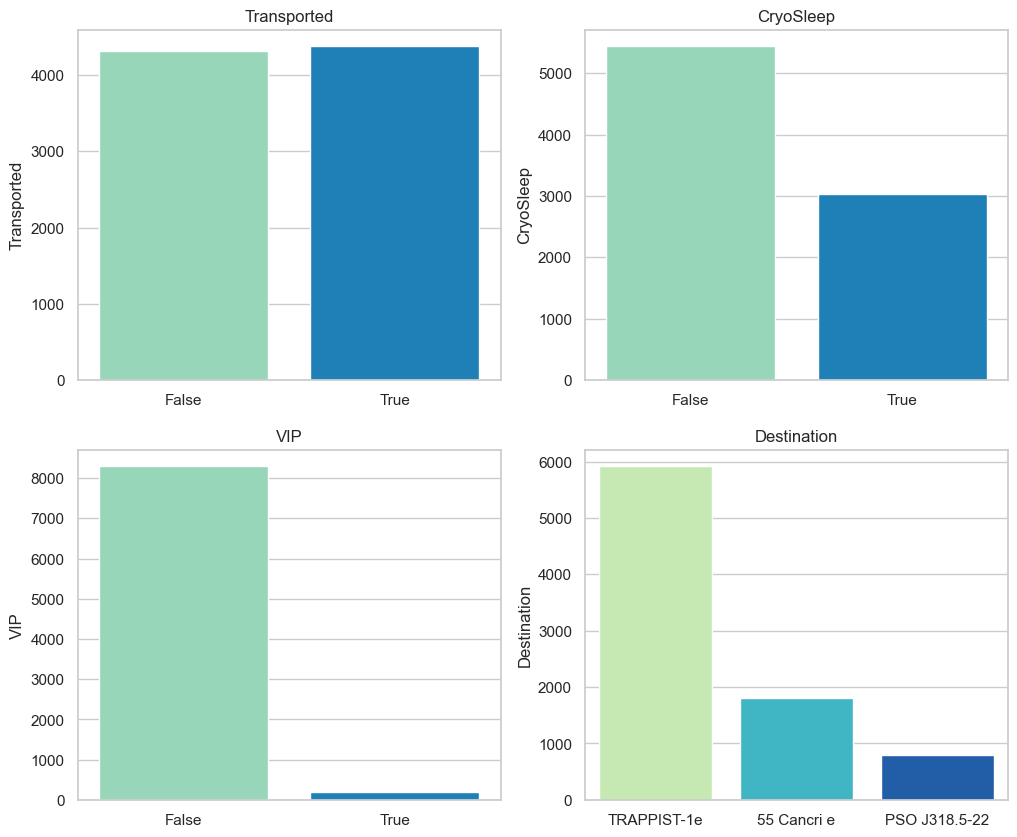

In [77]:
fig, axes = plt.subplots(2, 2, figsize = (12, 10))
axes = axes.flatten()
sns.set_theme(style = "whitegrid")
sns.barplot(ax = axes[0], x = train["Transported"].value_counts().index,
            y = train["Transported"].value_counts(),
            data = train, saturation = 1,palette="YlGnBu").set(title = "Transported");

sns.barplot(ax = axes[1], x = train["CryoSleep"].value_counts().index,
            y = train["CryoSleep"].value_counts(),
            data = train, saturation = 1,palette="YlGnBu").set(title = "CryoSleep");

sns.barplot(ax = axes[2], x = train["VIP"].value_counts().index,
            y = train["VIP"].value_counts(),
            data = train, saturation = 1,palette="YlGnBu").set(title = "VIP");

sns.barplot(ax = axes[3], x = train["Destination"].value_counts().index,
            y = train["Destination"].value_counts(),
            data = train, saturation = 1,palette='YlGnBu').set(title = "Destination");

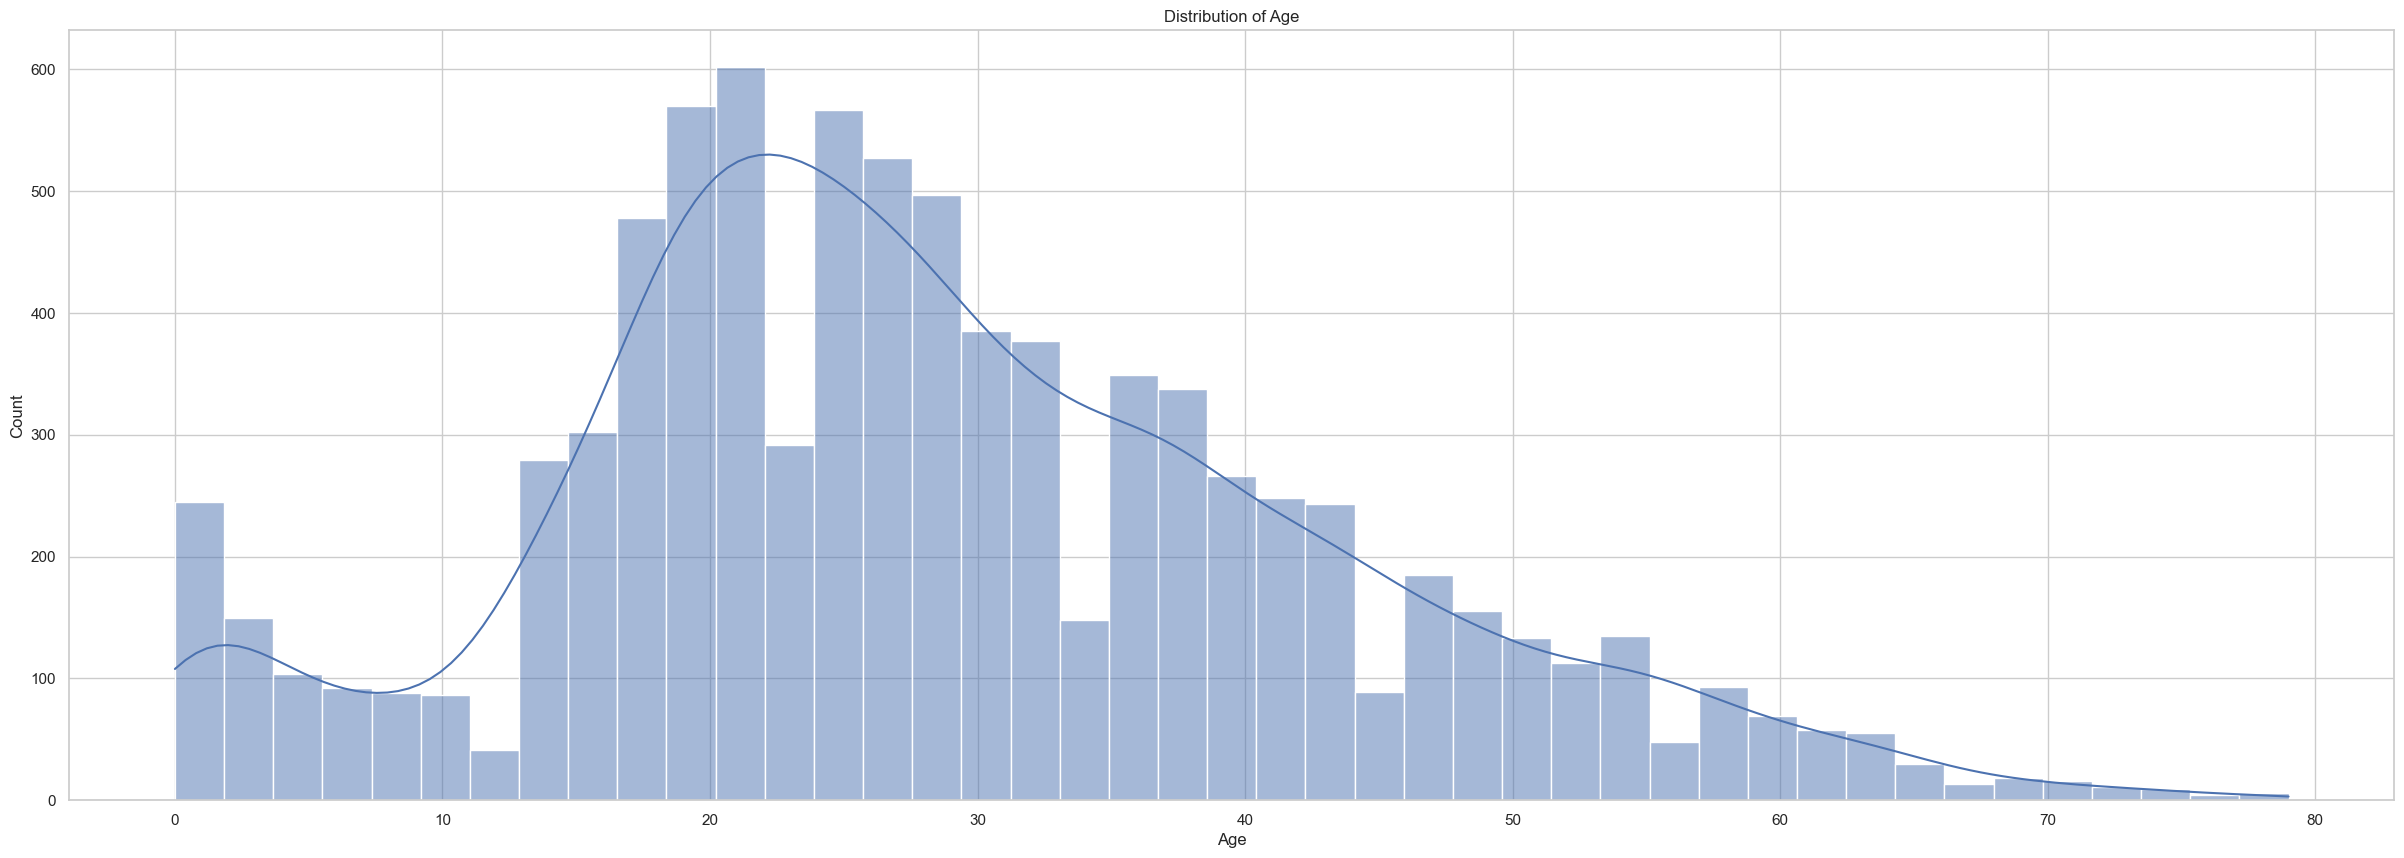

In [78]:
plt.figure(figsize=(30,10))
sns.histplot(train["Age"], kde=True,palette="YlGnBu").set_title(f"Distribution of Age");

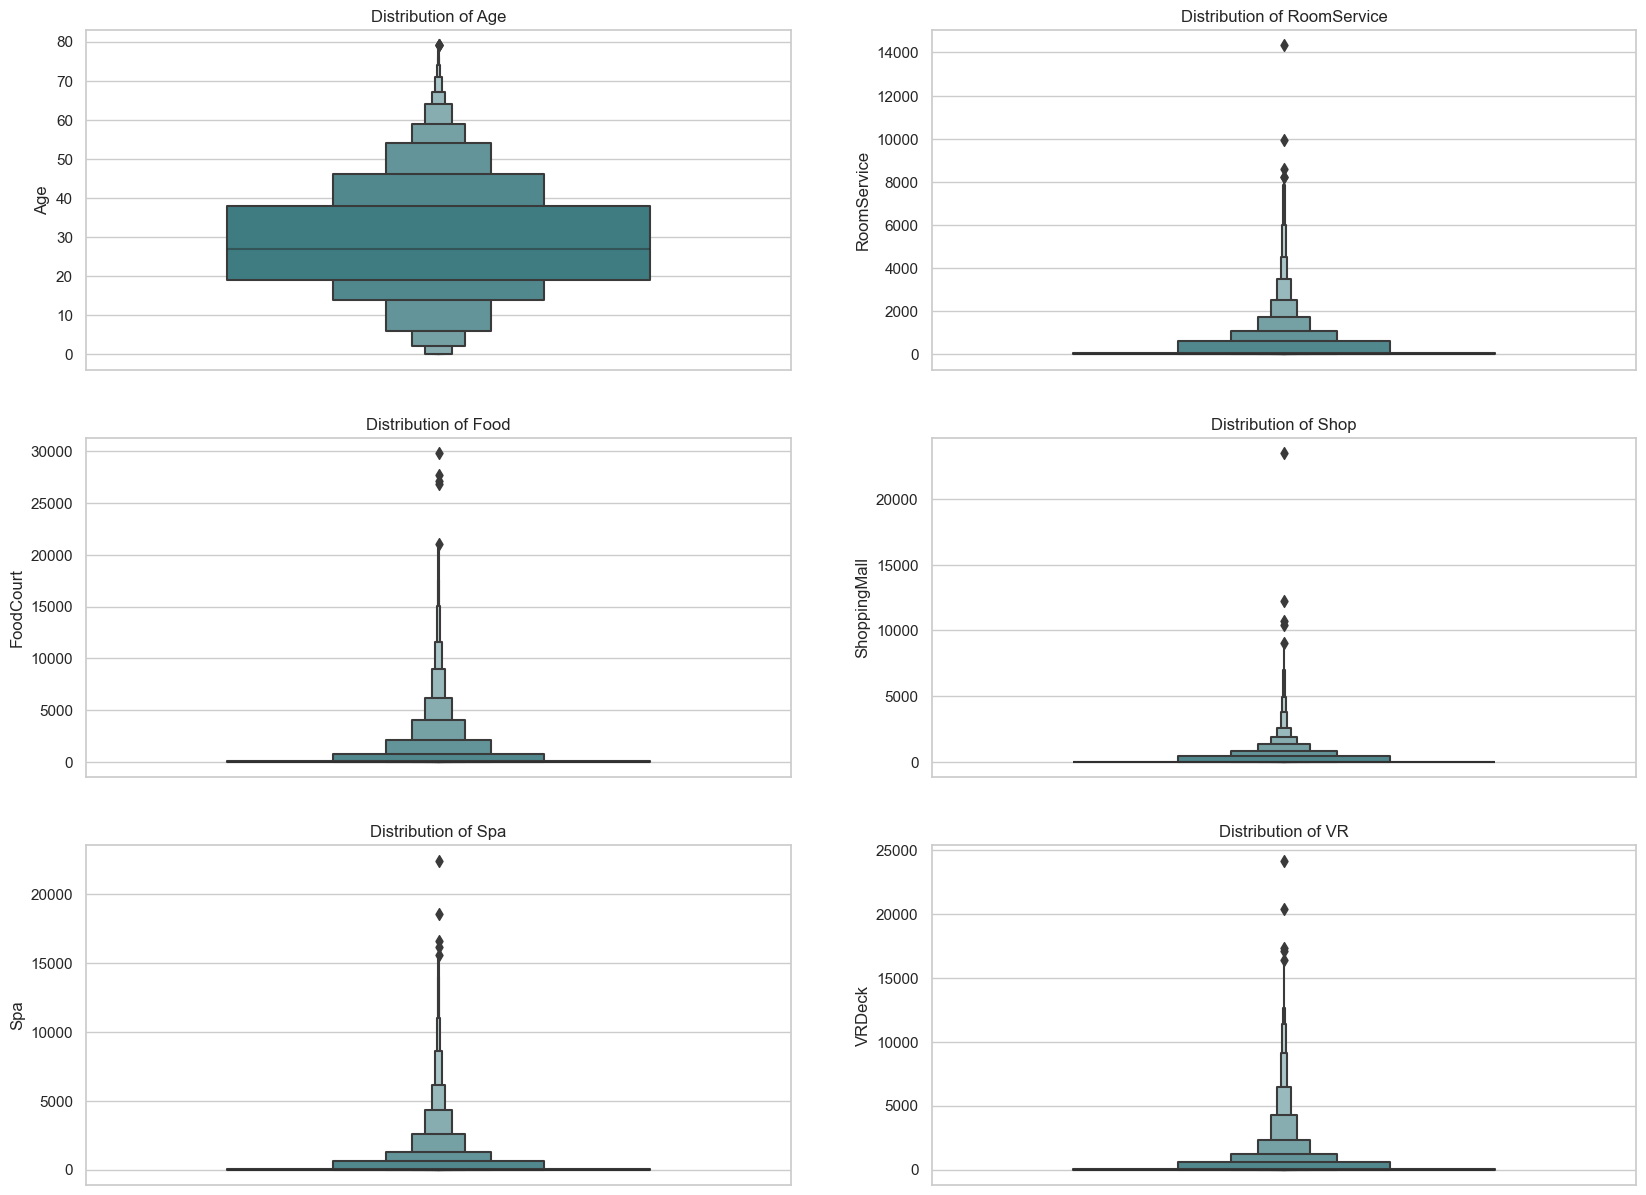

In [79]:
fig, axes = plt.subplots(3, 2, figsize = (20, 15))
sns.set_theme(style = "whitegrid")
axes = axes.flatten()
sns.set_theme(style = "whitegrid")
sns.boxenplot(ax=axes[0],y=train['Age'],palette="crest",width=0.6).set_title(f"Distribution of Age");
sns.boxenplot(ax=axes[1],y=train['RoomService'],palette="crest",width=0.6).set_title(f"Distribution of RoomService");
sns.boxenplot(ax=axes[2],y=train['FoodCourt'],palette="crest",width=0.6).set_title(f"Distribution of Food");
sns.boxenplot(ax=axes[3],y=train['ShoppingMall'],palette="crest",width=0.6).set_title(f"Distribution of Shop");
sns.boxenplot(ax=axes[4],y=train['Spa'],palette="crest",width=0.6).set_title(f"Distribution of Spa");
sns.boxenplot(ax=axes[5],y=train['VRDeck'],palette="crest",width=0.6).set_title(f"Distribution of VR");

Text(0.5, 1.0, 'Density between age and output')

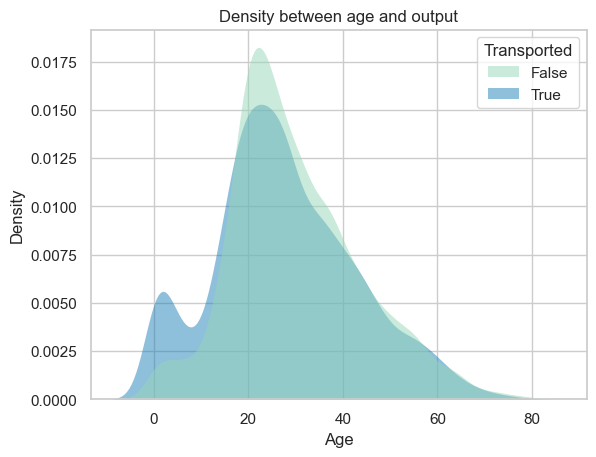

In [80]:
sns.kdeplot( data=train, x='Age',hue="Transported", fill=True,palette='YlGnBu', alpha=.5, linewidth=0).set_title(f"Density between age and output")

Text(0.5, 1.0, 'Density between RoomService and output')

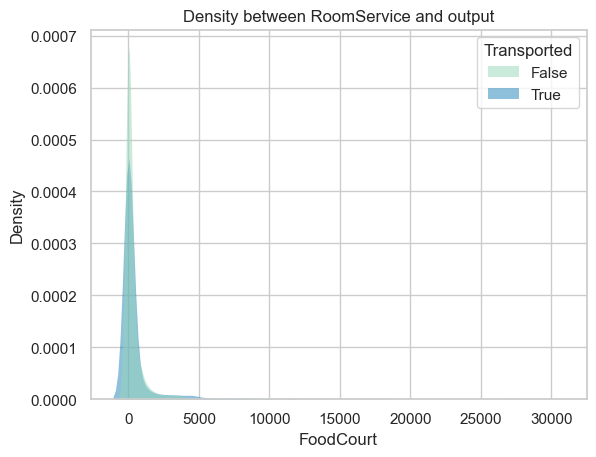

In [81]:
sns.kdeplot( data=train, x='FoodCourt',hue="Transported", fill=True,palette='YlGnBu', alpha=.5, linewidth=0).set_title(f"Density between RoomService and output")

Text(0.5, 1.0, 'Density between Spa and output')

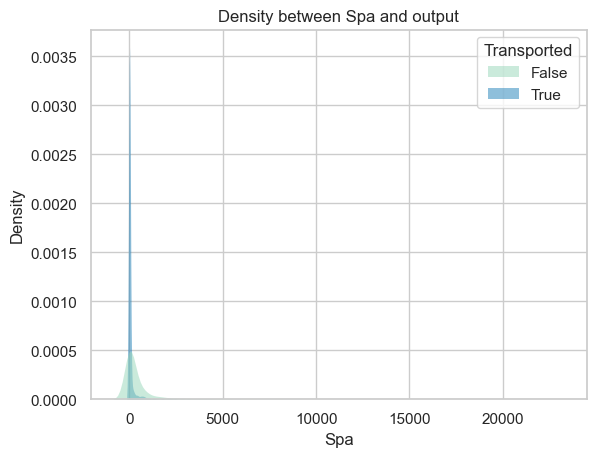

In [82]:
sns.kdeplot( data=train, x='Spa',hue="Transported", fill=True,palette='YlGnBu', alpha=.5, linewidth=0).set_title(f"Density between Spa and output")

Text(0.5, 1.0, 'Density between VRDeck and output')

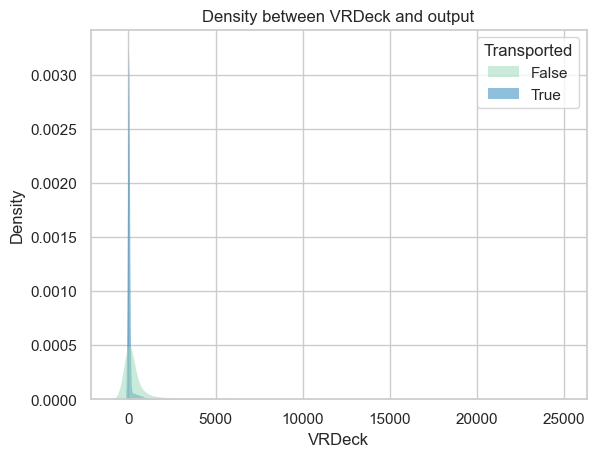

In [83]:
sns.kdeplot( data=train, x='VRDeck',hue="Transported", fill=True,palette='YlGnBu', alpha=.5, linewidth=0).set_title(f"Density between VRDeck and output")

Text(0.5, 1.0, 'Corrleation between sleep and output')

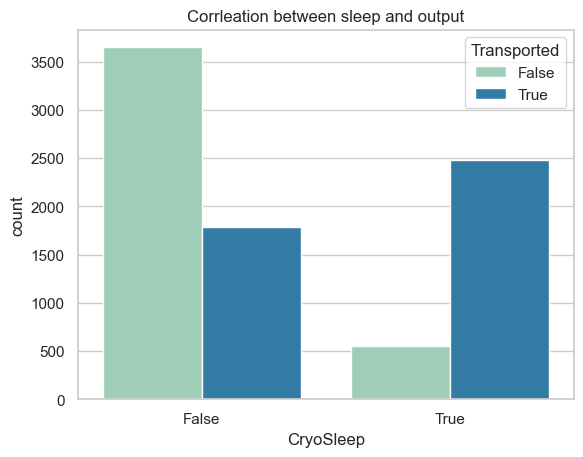

In [84]:
sns.set_theme(style = "whitegrid")
sns.countplot(x=train["CryoSleep"],hue=train['Transported'],palette='YlGnBu').set_title(f"Corrleation between sleep and output")

In [85]:
train['MissingCabin'] = 0 
for key in range(len(train)):
    if train['Cabin'].isna()[key] == True:
        train['MissingCabin'] = True
    else: 
        train['MissingCabin'] = False

Mark down the data which miss cabin first

In [86]:
def entertainment(df):
    new=[]
    for key in range(len(df)):
        if df[key] > 0.0:
            new.append(True)
        elif df[key] == 0.0:
            new.append(False)
        else:
            new.append('None')
    return new

def CheckNA(df):
    check = []
    for key in range(len(df)):
        if df.isna()[key] == True:
            check.append(True)
        else: 
            check.append(False)
    return check


Define two function
1. Create the new coulumn entertainment, this new attribute to determine the customer spent how much money in ship
2. Also create a column CheckNA that determine the corresponding attribute having missing value or not, preparing for the next step 

In [87]:
new = train["Cabin"].str.split("/", n = 2, expand = True)
train["Cabin_deck"]= new[0]
train["Cabin_num"]= new[1]
train["Cabin_side"]= new[2]
train['MissingSpa'] = CheckNA(train['Spa'])
train['MissingVRDeck'] = CheckNA(train['VRDeck'])
train['MissingFoodCourt'] = CheckNA(train['FoodCourt'])
train['MissingRoomService'] = CheckNA(train['RoomService'])
train['MissingShoppingMall'] = CheckNA(train['ShoppingMall'])

train['Spa']=train['Spa'].fillna(0)
train['VRDeck']=train['VRDeck'].fillna(0)
train['FoodCourt']=train['FoodCourt'].fillna(0)
train['RoomService']=train['RoomService'].fillna(0)
train['ShoppingMall']=train['ShoppingMall'].fillna(0)

train['Entertainment'] = train['RoomService'] + train['FoodCourt'] + train['ShoppingMall'] + train['Spa'] + train['VRDeck']
train.drop(columns=['Cabin'],inplace=True)
train['Spa'] = entertainment(train['Spa'])
train['VRDeck'] = entertainment(train['VRDeck'])
train['FoodCourt'] = entertainment(train['FoodCourt'])
train['RoomService'] = entertainment(train['RoomService'])
train['ShoppingMall'] = entertainment(train['ShoppingMall'])

train['MissingAge'] = CheckNA(train['Age']) 
train['MissingHome'] = CheckNA(train['HomePlanet']) 
train['MissingSleep'] = CheckNA(train['CryoSleep']) 
train['MissingDestination'] = CheckNA(train['Destination']) 
train['MissingVIP'] = CheckNA(train['VIP']) 

Applying these two functions for our data.

In [88]:
train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,MissingCabin,Cabin_deck,Cabin_num,Cabin_side,MissingSpa,MissingVRDeck,MissingFoodCourt,MissingRoomService,MissingShoppingMall,Entertainment,MissingAge,MissingHome,MissingSleep,MissingDestination,MissingVIP
0,Europa,False,TRAPPIST-1e,39.0,False,False,False,False,False,False,False,False,B,0,P,False,False,False,False,False,0.0,False,False,False,False,False
1,Earth,False,TRAPPIST-1e,24.0,False,True,True,True,True,True,True,False,F,0,S,False,False,False,False,False,736.0,False,False,False,False,False
2,Europa,False,TRAPPIST-1e,58.0,True,True,True,False,True,True,False,False,A,0,S,False,False,False,False,False,10383.0,False,False,False,False,False
3,Europa,False,TRAPPIST-1e,33.0,False,False,True,True,True,True,False,False,A,0,S,False,False,False,False,False,5176.0,False,False,False,False,False
4,Earth,False,TRAPPIST-1e,16.0,False,True,True,True,True,True,True,False,F,1,S,False,False,False,False,False,1091.0,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,False,True,False,True,True,False,False,A,98,P,False,False,False,False,False,8536.0,False,False,False,False,False
8689,Earth,True,PSO J318.5-22,18.0,False,False,False,False,False,False,False,False,G,1499,S,False,False,False,False,False,0.0,False,False,False,False,False
8690,Earth,False,TRAPPIST-1e,26.0,False,False,False,True,True,False,True,False,G,1500,S,False,False,False,False,False,1873.0,False,False,False,False,False
8691,Europa,False,55 Cancri e,32.0,False,False,True,False,True,True,False,False,E,608,S,False,False,False,False,False,4637.0,False,False,False,False,False


Training set become.

In [89]:
train['Age'].fillna(train['Age'].mean(), inplace=True)
train['HomePlanet'].fillna(train['HomePlanet'].mode()[0], inplace=True)
train['CryoSleep'].fillna(train['CryoSleep'].mode()[0], inplace=True)
train['Destination'].fillna(train['Destination'].mode()[0], inplace=True)
train['VIP'].fillna(train['VIP'].mode()[0], inplace=True)
train['Cabin_num'].fillna(train['Cabin_num'].mode()[0], inplace=True)
train['Cabin_deck'].fillna(train['Cabin_deck'].mode()[0], inplace=True)
train['Cabin_side'].fillna(train['Cabin_side'].mode()[0], inplace=True)

After using the function CheckNA to create new attributes towards missing data row, we now can fill in the missing number with mode or mean, it will be more accurate comparing with direct fill in.

In [90]:
train.isna().sum().sort_values(ascending=False)

HomePlanet             0
CryoSleep              0
MissingDestination     0
MissingSleep           0
MissingHome            0
MissingAge             0
Entertainment          0
MissingShoppingMall    0
MissingRoomService     0
MissingFoodCourt       0
MissingVRDeck          0
MissingSpa             0
Cabin_side             0
Cabin_num              0
Cabin_deck             0
MissingCabin           0
Transported            0
VRDeck                 0
Spa                    0
ShoppingMall           0
FoodCourt              0
RoomService            0
VIP                    0
Age                    0
Destination            0
MissingVIP             0
dtype: int64

Therefore we handled all the missing data

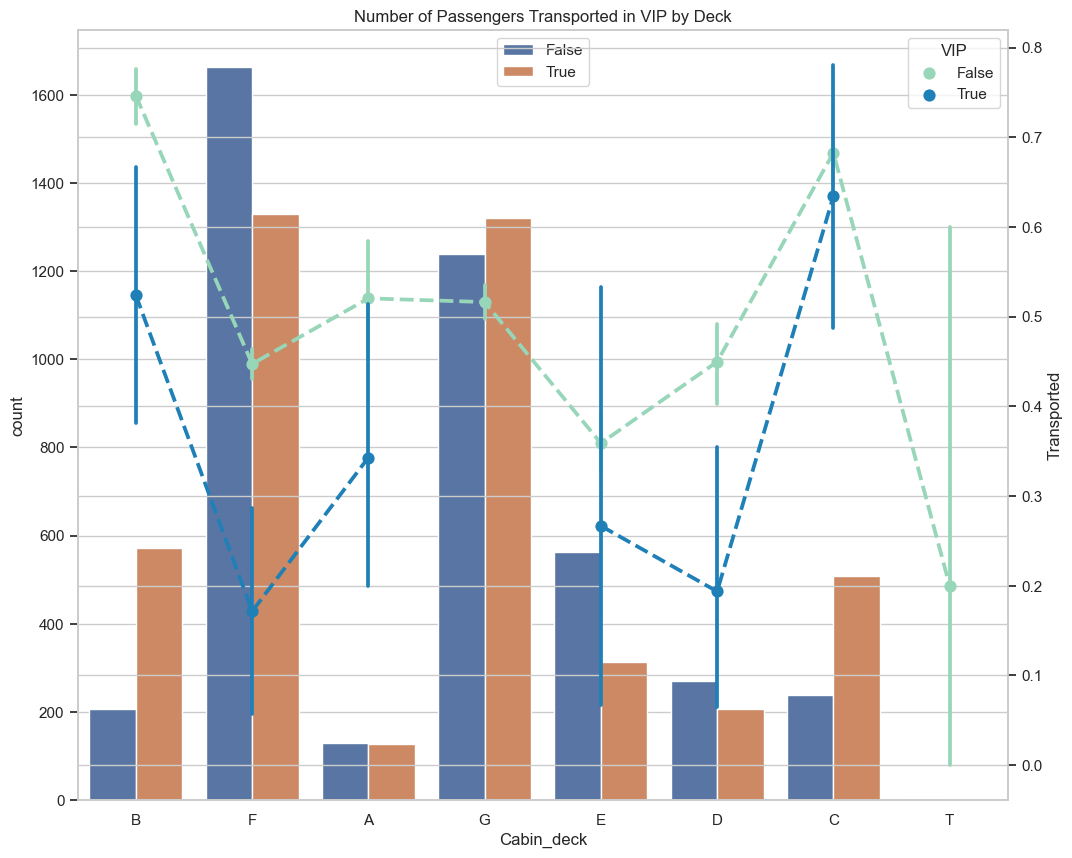

In [91]:
fig = plt.figure(figsize = (12, 10))
ax1 = sns.countplot(x='Cabin_deck', hue='Transported', data=train)
ax2 = ax1.twinx()
sns.pointplot(x='Cabin_deck',y='Transported', hue='VIP', data=train, 
              palette= 'YlGnBu',ax=ax2, linestyles='--')
plt.title('Number of Passengers Transported in VIP by Deck')
ax1.legend(loc='upper center');


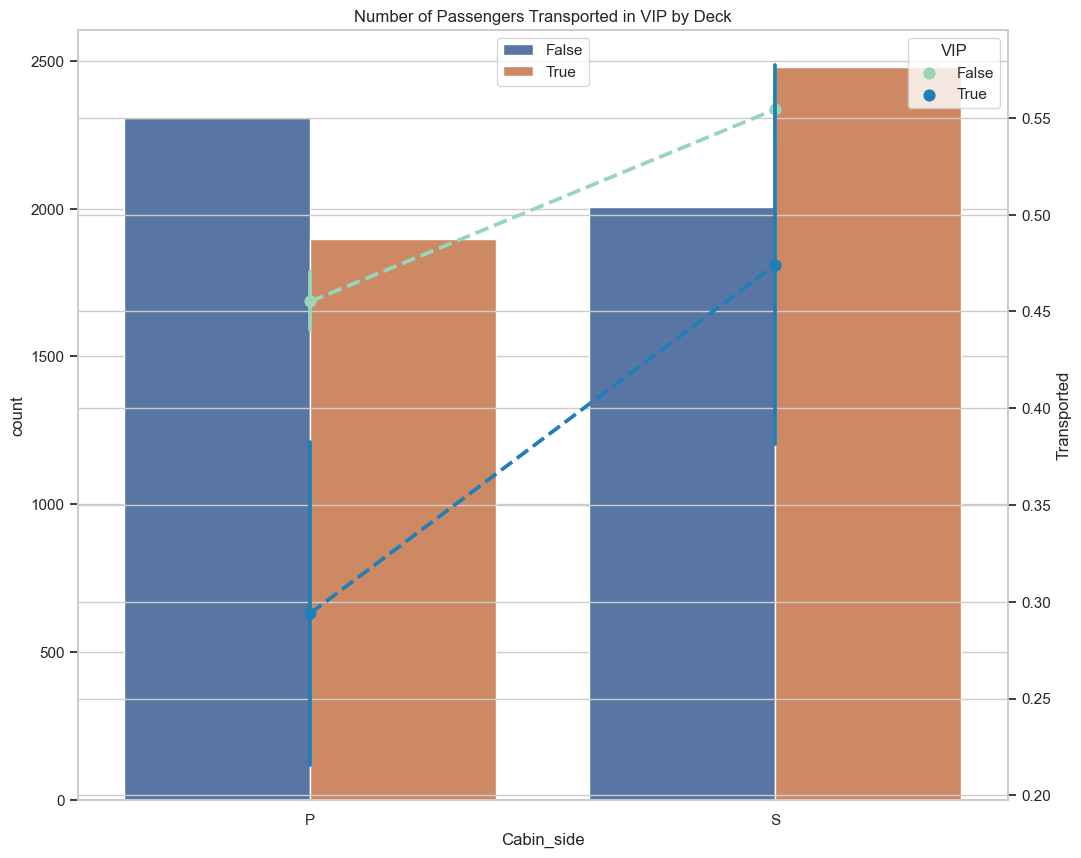

In [92]:
fig = plt.figure(figsize = (12, 10))
ax1 = sns.countplot(x='Cabin_side', hue='Transported', data=train)
ax2 = ax1.twinx()
sns.pointplot(x='Cabin_side',y='Transported', hue='VIP', data=train, 
              palette= 'YlGnBu',ax=ax2, linestyles='--')
plt.title('Number of Passengers Transported in VIP by Deck')
ax1.legend(loc='upper center');


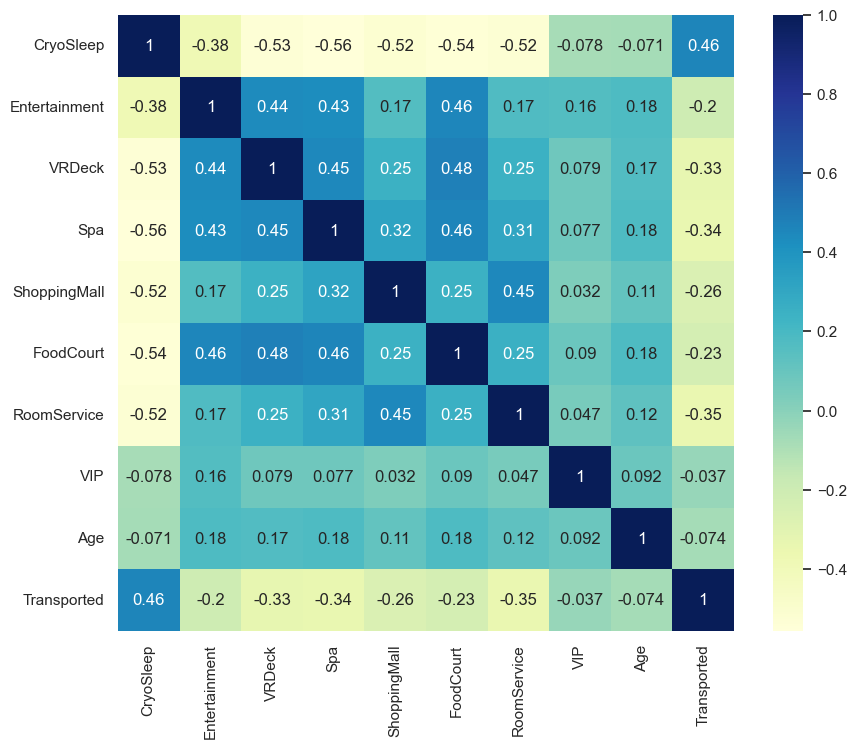

In [93]:
temp = train[['HomePlanet','CryoSleep','Entertainment','Cabin_side','Cabin_num','Cabin_deck','VRDeck','Spa','ShoppingMall','FoodCourt','RoomService','VIP','Age','Destination','Transported']] 
corr = temp.corr()
plt.figure(figsize=(10,8))
sns.set(font_scale=1) # size of font
sns.heatmap(corr, cbar=True, annot=True, square=True, cmap='YlGnBu')
plt.show()

In [94]:
train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,MissingCabin,Cabin_deck,Cabin_num,Cabin_side,MissingSpa,MissingVRDeck,MissingFoodCourt,MissingRoomService,MissingShoppingMall,Entertainment,MissingAge,MissingHome,MissingSleep,MissingDestination,MissingVIP
0,Europa,False,TRAPPIST-1e,39.0,False,False,False,False,False,False,False,False,B,0,P,False,False,False,False,False,0.0,False,False,False,False,False
1,Earth,False,TRAPPIST-1e,24.0,False,True,True,True,True,True,True,False,F,0,S,False,False,False,False,False,736.0,False,False,False,False,False
2,Europa,False,TRAPPIST-1e,58.0,True,True,True,False,True,True,False,False,A,0,S,False,False,False,False,False,10383.0,False,False,False,False,False
3,Europa,False,TRAPPIST-1e,33.0,False,False,True,True,True,True,False,False,A,0,S,False,False,False,False,False,5176.0,False,False,False,False,False
4,Earth,False,TRAPPIST-1e,16.0,False,True,True,True,True,True,True,False,F,1,S,False,False,False,False,False,1091.0,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,False,True,False,True,True,False,False,A,98,P,False,False,False,False,False,8536.0,False,False,False,False,False
8689,Earth,True,PSO J318.5-22,18.0,False,False,False,False,False,False,False,False,G,1499,S,False,False,False,False,False,0.0,False,False,False,False,False
8690,Earth,False,TRAPPIST-1e,26.0,False,False,False,True,True,False,True,False,G,1500,S,False,False,False,False,False,1873.0,False,False,False,False,False
8691,Europa,False,55 Cancri e,32.0,False,False,True,False,True,True,False,False,E,608,S,False,False,False,False,False,4637.0,False,False,False,False,False


In [95]:
temp1 = pd.get_dummies(train['HomePlanet'])
temp1.columns = ['Home_Earth', 'Home_Europa', 'Home_Mars']
temp2 = pd.get_dummies(train['CryoSleep'])
temp2.columns = ['Sleep_False', 'Sleep_True']
temp3 = pd.get_dummies(train['Destination'])
temp3.columns = ['Destination_5', 'Destination_PSO','Destination_TRA']
temp4 = pd.get_dummies(train['VIP'])
temp4.columns = ['VIP_False', 'VIP_True']
temp5 = pd.get_dummies(train['Cabin_deck'])
temp5.columns = ['Cabin_deck_A', 'Cabin_deck_B','Cabin_deck_C','Cabin_deck_D','Cabin_deck_E','Cabin_deck_F','Cabin_deck_G','Cabin_deck_T']
temp6 = pd.get_dummies(train['Cabin_side'])
temp6.columns = ['Cabin_side_P', 'Cabin_side_S']

train.drop(columns=['HomePlanet','CryoSleep','Destination','VIP','Cabin_deck','Cabin_side'],inplace=True)
train = pd.concat([train,temp1,temp2,temp3,temp4,temp5,temp6],axis=1)

Creating dummy variable for categorical data

In [96]:
train.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'MissingCabin', 'Cabin_num', 'MissingSpa',
       'MissingVRDeck', 'MissingFoodCourt', 'MissingRoomService',
       'MissingShoppingMall', 'Entertainment', 'MissingAge', 'MissingHome',
       'MissingSleep', 'MissingDestination', 'MissingVIP', 'Home_Earth',
       'Home_Europa', 'Home_Mars', 'Sleep_False', 'Sleep_True',
       'Destination_5', 'Destination_PSO', 'Destination_TRA', 'VIP_False',
       'VIP_True', 'Cabin_deck_A', 'Cabin_deck_B', 'Cabin_deck_C',
       'Cabin_deck_D', 'Cabin_deck_E', 'Cabin_deck_F', 'Cabin_deck_G',
       'Cabin_deck_T', 'Cabin_side_P', 'Cabin_side_S'],
      dtype='object')

In [97]:
train = train.loc[:,['Age','MissingAge','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','MissingSpa',
       'MissingVRDeck', 'MissingFoodCourt', 'MissingRoomService', 'MissingShoppingMall','Entertainment','Home_Earth', 'Home_Europa','Home_Mars','MissingHome','VIP_False', 'VIP_True','MissingVIP','Sleep_False', 'Sleep_True','MissingSleep','Destination_5',
       'Destination_PSO', 'Destination_TRA','MissingDestination','Cabin_num','Cabin_deck_A', 'Cabin_deck_B', 'Cabin_deck_C', 'Cabin_deck_D','Cabin_deck_E', 'Cabin_deck_F', 'Cabin_deck_G', 'Cabin_deck_T','Cabin_side_P', 'Cabin_side_S','MissingCabin','Transported'
       ]]

In [98]:
train.head(5)

,Age,MissingAge,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,MissingSpa,MissingVRDeck,MissingFoodCourt,MissingRoomService,MissingShoppingMall,Entertainment,Home_Earth,Home_Europa,Home_Mars,MissingHome,VIP_False,VIP_True,MissingVIP,Sleep_False,Sleep_True,MissingSleep,Destination_5,Destination_PSO,Destination_TRA,MissingDestination,Cabin_num,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_P,Cabin_side_S,MissingCabin,Transported
0,39.0,False,False,False,False,False,False,False,False,False,False,False,0.0,0,1,0,False,1,0,False,1,0,False,0,0,1,False,0,0,1,0,0,0,0,0,0,1,0,False,False
1,24.0,False,True,True,True,True,True,False,False,False,False,False,736.0,1,0,0,False,1,0,False,1,0,False,0,0,1,False,0,0,0,0,0,0,1,0,0,0,1,False,True
2,58.0,False,True,True,False,True,True,False,False,False,False,False,10383.0,0,1,0,False,0,1,False,1,0,False,0,0,1,False,0,1,0,0,0,0,0,0,0,0,1,False,False
3,33.0,False,False,True,True,True,True,False,False,False,False,False,5176.0,0,1,0,False,1,0,False,1,0,False,0,0,1,False,0,1,0,0,0,0,0,0,0,0,1,False,False
4,16.0,False,True,True,True,True,True,False,False,False,False,False,1091.0,1,0,0,False,1,0,False,1,0,False,0,0,1,False,1,0,0,0,0,0,1,0,0,0,1,False,True


In [99]:
X = train.drop(columns=['Transported'])
y_train = train['Transported']

In [100]:
test['MissingCabin'] = 0 
for key in range(len(test)):
    if test['Cabin'].isna()[key] == True:
        test['MissingCabin'] = True
    else: 
        test['MissingCabin'] = False

new = test["Cabin"].str.split("/", n = 2, expand = True)
test["Cabin_deck"]= new[0]
test["Cabin_num"]= new[1]
test["Cabin_side"]= new[2]
test['Entertainment'] = test['RoomService'] + test['FoodCourt'] + test['ShoppingMall'] + test['Spa'] + test['VRDeck']
test.drop(columns=['Cabin'],inplace=True)

test['MissingSpa'] = CheckNA(test['Spa'])
test['MissingVRDeck'] = CheckNA(test['VRDeck'])
test['MissingFoodCourt'] = CheckNA(test['FoodCourt'])
test['MissingRoomService'] = CheckNA(test['RoomService'])
test['MissingShoppingMall'] = CheckNA(test['ShoppingMall'])

test['Spa']=test['Spa'].fillna(0)
test['VRDeck']=test['VRDeck'].fillna(0)
test['FoodCourt']=test['FoodCourt'].fillna(0)
test['RoomService']=test['RoomService'].fillna(0)
test['ShoppingMall']=test['ShoppingMall'].fillna(0)

test['Entertainment'] = test['RoomService'] + test['FoodCourt'] + test['ShoppingMall'] + test['Spa'] + test['VRDeck']
test['Spa'] = entertainment(test['Spa'])
test['VRDeck'] = entertainment(test['VRDeck'])
test['FoodCourt'] = entertainment(test['FoodCourt'])
test['RoomService'] = entertainment(test['RoomService'])
test['ShoppingMall'] = entertainment(test['ShoppingMall'])

In [101]:
test['MissingAge'] = CheckNA(test['Age']) 
test['MissingHome'] = CheckNA(test['HomePlanet']) 
test['MissingSleep'] = CheckNA(test['CryoSleep']) 
test['MissingDestination'] = CheckNA(test['Destination']) 
test['MissingVIP'] = CheckNA(test['VIP']) 

test['Age'].fillna(test['Age'].mean(), inplace=True)
test['Entertainment'].fillna(test['Entertainment'].mean(), inplace=True)
test['HomePlanet'].fillna(test['HomePlanet'].mode()[0], inplace=True)
test['CryoSleep'].fillna(test['CryoSleep'].mode()[0], inplace=True)
test['Destination'].fillna(test['Destination'].mode()[0], inplace=True)
test['VIP'].fillna(test['VIP'].mode()[0], inplace=True)
test['Cabin_num'].fillna(test['Cabin_num'].mode()[0], inplace=True)
test['Cabin_deck'].fillna(test['Cabin_deck'].mode()[0], inplace=True)
test['Cabin_side'].fillna(test['Cabin_side'].mode()[0], inplace=True)

temp1 = pd.get_dummies(test['HomePlanet'])
temp1.columns = ['Home_Earth', 'Home_Europa', 'Home_Mars']
temp2 = pd.get_dummies(test['CryoSleep'])
temp2.columns = ['Sleep_False', 'Sleep_True']
temp3 = pd.get_dummies(test['Destination'])
temp3.columns = ['Destination_5', 'Destination_PSO','Destination_TRA']
temp4 = pd.get_dummies(test['VIP'])
temp4.columns = ['VIP_False', 'VIP_True']
temp5 = pd.get_dummies(test['Cabin_deck'])
temp5.columns = ['Cabin_deck_A', 'Cabin_deck_B','Cabin_deck_C','Cabin_deck_D','Cabin_deck_E','Cabin_deck_F','Cabin_deck_G','Cabin_deck_T']
temp6 = pd.get_dummies(test['Cabin_side'])
temp6.columns = ['Cabin_side_P', 'Cabin_side_S']
test.drop(columns=['HomePlanet','CryoSleep','Destination','VIP','Cabin_deck','Cabin_side'],inplace=True)
test = pd.concat([test,temp1,temp2,temp3,temp4,temp5,temp6],axis=1)

In [102]:
test = test.loc[:,['Age','MissingAge','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','MissingSpa',
       'MissingVRDeck', 'MissingFoodCourt', 'MissingRoomService', 'MissingShoppingMall','Entertainment','Home_Earth', 'Home_Europa','Home_Mars','MissingHome','VIP_False', 'VIP_True','MissingVIP','Sleep_False', 'Sleep_True','MissingSleep','Destination_5',
       'Destination_PSO', 'Destination_TRA','MissingDestination','Cabin_num','Cabin_deck_A', 'Cabin_deck_B', 'Cabin_deck_C', 'Cabin_deck_D','Cabin_deck_E', 'Cabin_deck_F', 'Cabin_deck_G', 'Cabin_deck_T','Cabin_side_P', 'Cabin_side_S','MissingCabin']]

Doing same data processing method towards test data

In [32]:
scaler1 = StandardScaler()
X_train = pd.DataFrame(
    scaler1.fit_transform(X),
    columns = X.columns
)

X_test = pd.DataFrame(
    scaler1.transform(test),
    columns = test.columns
)


Using Standard Scaler

In [33]:
scaler2 = MinMaxScaler()
X_train = pd.DataFrame(
    scaler2.fit_transform(X),
    columns = X.columns
)

X_test = pd.DataFrame(
    scaler2.transform(test),
    columns = test.columns
)

Using Minmax Scaler

In [103]:
scaler3 = RobustScaler()
X_train = pd.DataFrame(
    scaler3.fit_transform(X),
    columns = X.columns
)

X_test = pd.DataFrame(
    scaler3.transform(test),
    columns = test.columns
)

In [104]:
X_train

,Age,MissingAge,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,MissingSpa,MissingVRDeck,MissingFoodCourt,MissingRoomService,MissingShoppingMall,Entertainment,Home_Earth,Home_Europa,Home_Mars,MissingHome,VIP_False,VIP_True,MissingVIP,Sleep_False,Sleep_True,MissingSleep,Destination_5,Destination_PSO,Destination_TRA,MissingDestination,Cabin_num,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_P,Cabin_side_S,MissingCabin
0,0.705882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.496877,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.489771,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0
1,-0.176471,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.013879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.489771,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.823529,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,6.708536,-1.0,1.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.489771,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.352941,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.095073,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.489771,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.647059,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.260236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.488568,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.823529,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.426787,-1.0,1.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,-0.371841,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0
8689,-0.529412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.496877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,1.0,-1.0,0.0,1.314079,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8690,-0.058824,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.802915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.315283,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8691,0.294118,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.721027,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.241877,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Using Robust Scaler

Standardize training and testing data

In [136]:
logr = LogisticRegression()
param_grid_logr = [
    {'penalty':['l1','l2','elasticnet','none'],
    'dual':[True,False],
    'fit_intercept':[True,False],
    'C':[0.001, 0.01, 0.05, 0.1],
    'class_weight':[dict,'balanced'],
    'solver':['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter':[100,1000],
    'multi_class':['auto','ovr','multinomial'],
    'warm_start':[True,False]
    }
]
param_logr = GridSearchCV(logr, param_grid = param_grid_logr, cv = 3, verbose=True,scoring="f1")
best_param_logr = param_logr.fit(X_train,y_train)
best_param_logr.best_params_

Fitting 3 folds for each of 7680 candidates, totalling 23040 fits


{'C': 0.05,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'max_iter': 100,
 'multi_class': 'multinomial',
 'penalty': 'l2',
 'solver': 'lbfgs',
 'warm_start': True}

In [137]:
logr = LogisticRegression(C = 0.05 , class_weight = 'balanced', dual = False, fit_intercept = True, max_iter = 100, multi_class = 'multinomial', penalty= 'l2', solver= 'lbfgs', warm_start = True)
logr.fit(X_train,y_train)
logr_Prediction = logr.predict(X_test)
logr_Prediction = logr_Prediction.astype(np.bool_)

In [132]:
knn = KNeighborsClassifier()
param_grid_knn = [
    {
    'weights':['uniform', 'distance'],
    'algorithm':['auto','ball_tree', 'kd_tree', 'brute'],
    'metric':['str','callable', 'minkowski'],
    'p':[1,2]
    }
]
param_knn = GridSearchCV(knn, param_grid = param_grid_knn, cv = 3, verbose=True,scoring="f1")
best_param_knn = param_knn.fit(X_train,y_train)
best_param_knn.best_params_

Fitting 3 folds for each of 48 candidates, totalling 144 fits


{'algorithm': 'ball_tree', 'metric': 'minkowski', 'p': 1, 'weights': 'uniform'}

In [133]:
knn_Model = KNeighborsClassifier(algorithm='ball_tree',metric='minkowski',p=1,weights='uniform')
knn_Model.fit(X_train, y_train)
knn_Prediction = knn_Model.predict(X_test)

In [131]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_Prediction = gnb.predict(X_test)

In [41]:
svm = SVC()
param_grid_svm = [
    {
    'kernel':['rbf','linear','sigmoid']
    'gamma':['scale', 'auto'],
    'class_weight':['dict' , 'balanced'],
    'decision_function_shape':['ovo', 'ovr'],
    'probability':[True,False],
    'shrinking':[True,False],
    'verbose':[True,False]
    }
]
param_svm = GridSearchCV(svm, param_grid = param_grid_svm, cv = 2, verbose=True,scoring="f1")
best_param_svm = param_svm.fit(X_train,y_train)
best_param_svm.best_params_

Fitting 2 folds for each of 64 candidates, totalling 128 fits
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

{'class_weight': 'balanced',
 'decision_function_shape': 'ovo',
 'gamma': 'scale',
 'probability': True,
 'shrinking': True,
 'verbose': True}

In [42]:
svm = SVC(kernel='rbf',class_weight='balanced',decision_function_shape='ovo',gamma='scale',probability=True,shrinking=True,verbose=True)
svm.fit(X_train, y_train)
svm_Prediction = svm.predict(X_test)

[LibSVM]

In [144]:
rf = RandomForestClassifier()
param_grid_rf = [
    {'n_estimators':[200,400,600],
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_features':['sqrt', 'log2', None],
    'class_weight':['balanced', 'balanced_subsample'],
    'random_state':[42],
    'bootstrap':[0,1],
    'oob_score':[0,1],
    'warm_start':[0,1],
    }
]
param_rf = GridSearchCV(rf, param_grid = param_grid_rf, cv = 3, verbose=True,scoring="f1")
best_param_rf = param_rf.fit(X_train,y_train)
best_param_rf.best_params_

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


{'bootstrap': 1,
 'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_features': 'log2',
 'n_estimators': 200,
 'oob_score': 0,
 'random_state': 42,
 'warm_start': 0}

In [146]:
rf_Model = RandomForestClassifier(bootstrap=1,class_weight='balanced_subsample',criterion='gini',max_features='log2',n_estimators=200,random_state=42,oob_score=0,warm_start=0)
rf_Model.fit(X_train, y_train)
rf_Prediction = rf_Model.predict(X_test)

In [43]:
gb = GradientBoostingClassifier()
param_grid_gb = [
    {
    'loss':['log_loss', 'deviance', 'exponential'],
    'learning_rate':[0.1,0.01,0.001],
    'n_estimators':[100,200,400,600,800],
    'subsample':[0.0,0.5,1],
    'criterion':['friedman_mse', 'squared_error', 'mse'],
    'max_features':['auto', 'sqrt', 'log2'],
    'init':['estimator','zero'],

    }
]
param_gb = GridSearchCV(gb, param_grid = param_grid_gb, cv = 3, verbose=True,scoring="f1")
best_param_gb = param_gb.fit(X_train,y_train)
best_param_gb.best_params_


Fitting 3 folds for each of 2430 candidates, totalling 7290 fits


{'criterion': 'squared_error',
 'init': 'zero',
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_features': 'log2',
 'n_estimators': 100,
 'subsample': 1}

In [44]:
gb_Model = GradientBoostingClassifier(criterion = 'squared_error',learning_rate=0.1, loss='log_loss',max_features='log2',n_estimators=100,subsample=1,random_state=42,init='zero')
gb_Model.fit(X_train, y_train)
gb_Prediction = gb_Model.predict(X_test)

In [150]:
ada = AdaBoostClassifier()
param_grid_ada = [
    {
    'algorithm':['SAMME', 'SAMME.R'],
    'n_estimators':[100,500,1000],
    'learning_rate':[0.1,0.01,0.001]

    }
]
param_ada = GridSearchCV(ada, param_grid = param_grid_ada, cv = 3, verbose=True,scoring="f1")
best_param_ada = param_ada.fit(X_train,y_train)
best_param_ada.best_params_


Fitting 3 folds for each of 18 candidates, totalling 54 fits


{'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 1000}

In [151]:
ada_Model = AdaBoostClassifier(algorithm='SAMME',learning_rate=0.1,n_estimators=1000)
ada_Model.fit(X_train, y_train)
ada_Prediction = ada_Model.predict(X_test)

In [158]:
LogResult = pd.DataFrame([ID,logr_Prediction])
LogResult = LogResult.T
LogResult.columns=['PassengerId','Transported']

knnResult = pd.DataFrame([ID,knn_Prediction])
knnResult = knnResult.T
knnResult.columns=['PassengerId','Transported']

gnbResult = pd.DataFrame([ID,gnb_Prediction])
gnbResult = gnbResult.T
gnbResult.columns=['PassengerId','Transported']

SVMResult = pd.DataFrame([ID,svm_Prediction])
SVMResult = SVMResult.T
SVMResult.columns=['PassengerId','Transported']

rfResult = pd.DataFrame([ID,rf_Prediction])
rfResult = rfResult.T
rfResult.columns=['PassengerId','Transported']

adaResult = pd.DataFrame([ID,ada_Prediction])
adaResult = adaResult.T
adaResult.columns=['PassengerId','Transported']

gbResult = pd.DataFrame([ID,gb_Prediction])
gbResult = gbResult.T
gbResult.columns=['PassengerId','Transported']

In [159]:
#LogResult.to_csv('SpaceTitanicLog.csv',index=False)
#rfResult.to_csv('SpaceTitanicRf.csv',index=False)
#knnResult.to_csv('SpaceTitanicKnn.csv',index=False)
#gnbResult.to_csv('SpaceTitanicGnb.csv',index=False)
#gbResult.to_csv('SpaceTitanicGb.csv',index=False)
#CatResult.to_csv('SpaceTitanicCat.csv',index=False)
#adaResult.to_csv('SpaceTitanicada.csv',index=False)
#xgResult.to_csv('SpaceTitanicXg.csv',index=False)
#SVMResult.to_csv('SpaceTitanicSVM.csv',index=False)